In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import random
import functools
import keras
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K

np.random.seed(1)

In [33]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz

--2019-03-06 14:19:10--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.105.245
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.105.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98752094 (94M) [application/x-tar]
Saving to: ‘imagenette-160.tgz.1’

imagenette-160.tgz. 100%[===================>]  94.18M  3.16MB/s    in 24s     

2019-03-06 14:19:35 (3.85 MB/s) - ‘imagenette-160.tgz.1’ saved [98752094/98752094]



In [34]:
!ls

imagenette-160	imagenette-160.tgz  imagenette-160.tgz.1  sample_data


https://github.com/fastai/imagenette

In [4]:
!tar -xvzf imagenette-160.tgz

imagenette-160/
imagenette-160/val/
imagenette-160/val/n03028079/
imagenette-160/val/n03028079/ILSVRC2012_val_00034021.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00026451.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00006268.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00004912.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00009705.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00017783.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00033509.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00046232.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00019331.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00005295.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00048853.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00035753.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00004939.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00008116.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00034220.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00034534.JPEG
imagen

In [5]:
!ls

imagenette-160	imagenette-160.tgz  sample_data


In [6]:
os.listdir("imagenette-160/")

['val', 'train']

In [0]:
training_folder_paths = os.listdir("imagenette-160/train/")

In [0]:
validation_folder_paths = os.listdir("imagenette-160/val/")

In [0]:
PATH_TRAIN = "imagenette-160/train/"
PATH_VAL = "imagenette-160/val/"

In [10]:
for path in training_folder_paths:
  contents =glob.glob(os.path.join(PATH_TRAIN,'{}/'.format(path),'*.JPEG'))
  print(len(contents))

1300
1300
1300
1300
1300
1300
1300
1194
1300
1300


In [11]:
for path in validation_folder_paths:
  contents =glob.glob(os.path.join(PATH_VAL,'{}/'.format(path),'*.JPEG'))
  print(len(contents))

50
50
50
50
50
50
50
50
50
50


In [12]:
'13' == training_folder_paths[9][-2:]

True

In [13]:
!ls

imagenette-160	imagenette-160.tgz  sample_data


In [14]:
training_images = []
training_labels = []

for path in training_folder_paths:
  
  if '57' == path[-2:]:
    label = 0
  elif '77' == path[-2:]:
    label = 1
  elif '86' == path[-2:]:
    label = 2
  elif '40' == path[-2:]:
    label = 3
  elif '64' == path[-2:]:
    label = 4
  elif '79' == path[-2:]:
    label = 5
  elif '16' == path[-2:]:
    label = 6
  elif '84' == path[-2:]:
    label = 7
  elif '42' == path[-2:]:
    label = 8
  elif '13' == path[-2:]:
    label = 9
  else:
    label = None
    
  image_paths =glob.glob(os.path.join(PATH_TRAIN,'{}/'.format(path),'*.JPEG'))
  
  for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img=cv2.resize(img,(160, 160),interpolation=cv2.INTER_AREA)
      training_images.append(img)
      training_labels.append(label)

training_images = np.array(training_images)
training_labels = np.array(training_labels)

training_images.shape, training_labels.shape

((12894, 160, 160, 3), (12894,))

In [15]:
validation_images = []
validation_labels = []

for path in validation_folder_paths:
  
  if '57' == path[-2:]:
    label = 0
  elif '77' == path[-2:]:
    label = 1
  elif '86' == path[-2:]:
    label = 2
  elif '40' == path[-2:]:
    label = 3
  elif '64' == path[-2:]:
    label = 4
  elif '79' == path[-2:]:
    label = 5
  elif '16' == path[-2:]:
    label = 6
  elif '84' == path[-2:]:
    label = 7
  elif '42' == path[-2:]:
    label = 8
  elif '13' == path[-2:]:
    label = 9
  else:
    label = None
    
  image_paths =glob.glob(os.path.join(PATH_VAL,'{}/'.format(path),'*.JPEG'))
  
  for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img=cv2.resize(img,(160, 160),interpolation=cv2.INTER_AREA)
      validation_images.append(img)
      validation_labels.append(label)

validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

validation_images.shape, validation_labels.shape

((500, 160, 160, 3), (500,))

In [16]:
# one hot encoded vectors
num_classes = 10

y_train = np_utils.to_categorical(training_labels, num_classes)
y_val = np_utils.to_categorical(validation_labels, num_classes)

print(y_train.shape, y_val.shape)

(12894, 10) (500, 10)


In [0]:
def naive():
    input_shape = (160, 160, 3)
    model = Sequential()
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    return model

In [0]:
# top 1 accuracy metric defined here

top1_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=1)
top1_acc.__name__ = 'top1_acc'

In [36]:
def vgg_scratch():
    
    # do
    base_model = VGG16(weights=None,include_top=False,pooling='avg',input_shape=(160 , 160, 3))
    base_model.trainable = False
    X = base_model.output
    X.trainable = False
    predictions = Dense(10, activation='softmax', trainable=True)(X)  
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy', top1_acc]) 
    return model

model = None
model=vgg_scratch()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0         
__________

In [41]:
print(training_images.shape, validation_images.shape, y_train.shape, y_val.shape)

(12894, 160, 160, 3) (500, 160, 160, 3) (12894, 10) (500, 10)


In [40]:
!ls

imagenette-160	imagenette-160.tgz  sample_data


In [0]:
#!rm -r imagenette-160.tgz.1

In [42]:
path_model='vgg_scratch.h5'  
K.set_value(model.optimizer.lr, 0.01) 

h=model.fit(x=training_images,     
            y=y_train,
          
            batch_size=128, 
            epochs=10, 
            
            verbose=1, 
            validation_data=(validation_images, y_val),
            
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Train on 12894 samples, validate on 500 samples
Epoch 1/10
12894/12894 [==============================] - 181s 14ms/step - loss: 2.2171 - acc: 0.1845 - top1_acc: 0.1845 - val_loss: 2.4424 - val_acc: 0.1560 - val_top1_acc: 0.1560
Epoch 2/10
12894/12894 [==============================] - 179s 14ms/step - loss: 2.0728 - acc: 0.2707 - top1_acc: 0.2707 - val_loss: 2.1204 - val_acc: 0.2560 - val_top1_acc: 0.2560
Epoch 3/10
12894/12894 [==============================] - 179s 14ms/step - loss: 1.9306 - acc: 0.3237 - top1_acc: 0.3237 - val_loss: 1.8955 - val_acc: 0.3960 - val_top1_acc: 0.3960
Epoch 4/10
12894/12894 [==============================] - 179s 14ms/step - loss: 1.8267 - acc: 0.3623 - top1_acc: 0.3623 - val_loss: 1.6788 - val_acc: 0.4480 - val_top1_acc: 0.4480
Epoch 5/10
12894/12894 [==============================] - 179s 14ms/step - loss: 1.7521 - acc: 0.3979 - top1_acc: 0.3979 - val_loss: 1.6017 - val_acc: 0.4560 - val_top1_acc: 0.4560
Epoch 6/10
12894/12894 [=======================

| Experiments | Train | Validation  | Test | Others 
|------|------|------|------|------|
|   1   | 51.77 | 54.40   | xx  |  10 epochs, dim=160, bs=128, loss = cat_cross_entropy
|   2   | xx | xx  | xx  |  xx
|   3   | xx| xx   | xx  |  xx

In [0]:
def plot_loss_accu(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'g')
    plt.plot(epochs, val_loss, 'y')
    plt.title('Training loss')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid('on')
    plt.show()
    loss = history.history['acc']
    val_loss = history.history['val_acc']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Training accuracy')
    plt.legend(['train', 'val'], loc='lower right')
    plt.grid('on')
    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


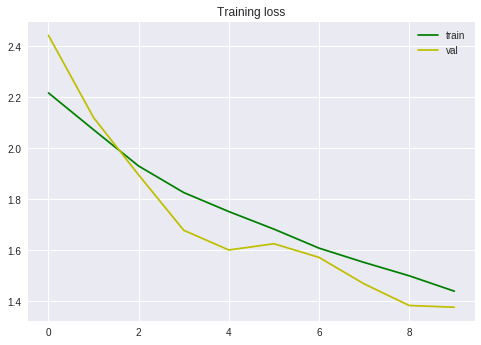

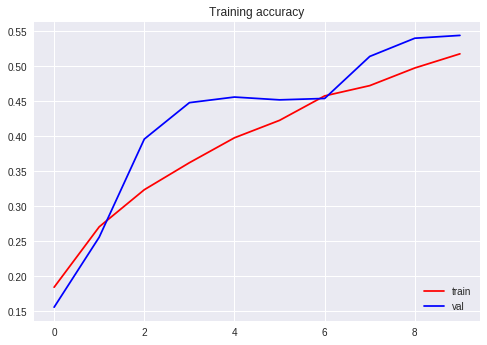

In [46]:
plot_loss_accu(h)

In [53]:
print(model.metrics_names)

['loss', 'acc', 'top1_acc']


In [54]:
# Score trained model.

scores = model.evaluate(validation_images, y_val, verbose=1)

print(scores)
print('Test loss:', scores[0])
print('Test accuracy in %:', scores[1] * 100)

500/500 [==============================] - 3s 5ms/step
[1.377517292022705, 0.544, 0.544]
Test loss: 1.377517292022705
Test accuracy in %: 54.400000000000006


In [0]:
print("The End")